<h1 style="text-align: center;">User Expenses Prediction - Data Preparation</h1>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
# Sheet has two tabs so we import both tabs
df1 = pd.read_excel('raw_dataset.xlsx', sheet_name=0)  # First sheet
df2 = pd.read_excel('raw_dataset.xlsx', sheet_name=1)  # Second sheet

In [19]:
# Concatenate both tabs
df = pd.concat([df1, df2], ignore_index=True)

# Deleting Duplicates
total_rows_before = len(df)
total_rows_after = len(df.drop_duplicates())
duplicate_count = total_rows_before - total_rows_after
print(f"Number of duplicate rows deleted: {duplicate_count}")
df.drop_duplicates(inplace=True)

Number of duplicate rows deleted: 34335


In [20]:
print(f'The combined df has {df.shape} rows & columns \n')
print('Null Values:')
df.isna().sum()

The combined df has (1033036, 8) rows & columns 

Null Values:


Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

1 million Data is more than enough for us to train our model if it was for predicting the retail store sales but we need data for one specifc user for user specifc prediction

In [26]:
# Dropping null values
df.dropna(inplace=True)
df.shape

(797885, 8)

After dropping the null values we still have over 790k datasets. Nice

In [30]:
mode_df = df['Customer ID'].value_counts().to_dict()
top_5_df1 = dict(list(mode_df.items())[:5])
print(top_5_df1)

{17841.0: 12638, 14911.0: 11444, 12748.0: 6662, 14606.0: 6500, 14096.0: 5128}


We have two users that have high records in both dataset combined (i.e 2009-2011):
1. User ID <b>17841 (user_x)</b>: 12638
2. User ID <b>14911 (user_y)</b>: 11444

These two users have highest number of records in both dataset. They can be taken as reference for our dataset preparation. Between those two we need to find the best fit user with less inconsistency in the dataset.

Testing for user 14911 (user_x)

In [31]:
user_x = df1[df1['Customer ID'] == 17841]
user_x.set_index('InvoiceDate',inplace=True)
user_x.sort_index(inplace=True)

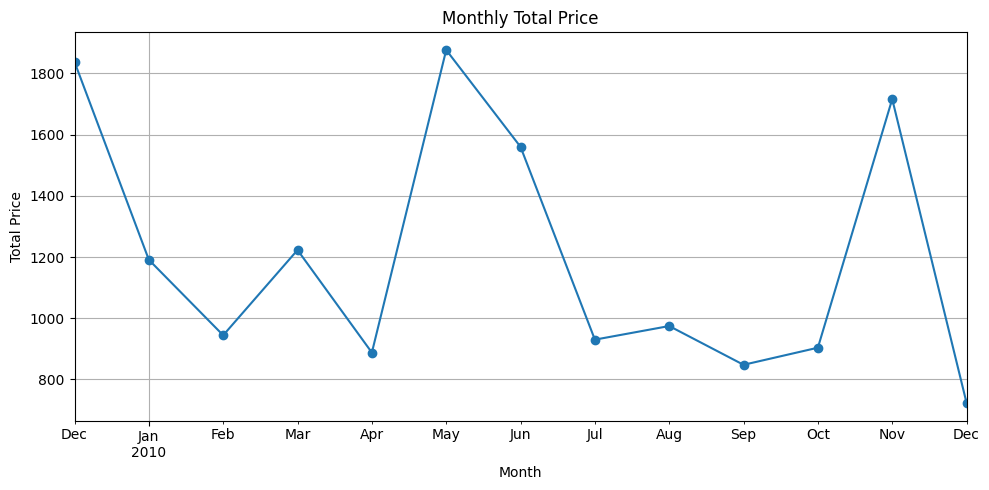

In [49]:
# Resample and sum monthly prices
monthly_price = user_x['Price'].resample('ME').sum()
monthly_price.plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Total Price')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid(True)
plt.tight_layout()
plt.show()

Testing for user y

In [58]:
user_y = df[df['Customer ID'] == 14911]
user_y.set_index('InvoiceDate',inplace=True)
user_y.sort_index(inplace=True)

In [59]:
user_y['Price'].resample('ME').sum()

InvoiceDate
2009-12-31    2992.40
2010-01-31    7656.57
2010-02-28    3146.13
2010-03-31    4129.63
2010-04-30    1533.87
2010-05-31    2278.30
2010-06-30    2652.57
2010-07-31    1452.18
2010-08-31    1401.68
2010-09-30    4064.77
2010-10-31    5292.81
2010-11-30    2846.90
2010-12-31    1573.16
2011-01-31     722.67
2011-02-28     440.05
2011-03-31    8370.76
2011-04-30     936.46
2011-05-31    1970.45
2011-06-30    1592.40
2011-07-31    1661.05
2011-08-31    1924.47
2011-09-30    3752.98
2011-10-31    3134.22
2011-11-30    3829.61
2011-12-31    1117.01
Freq: ME, Name: Price, dtype: float64

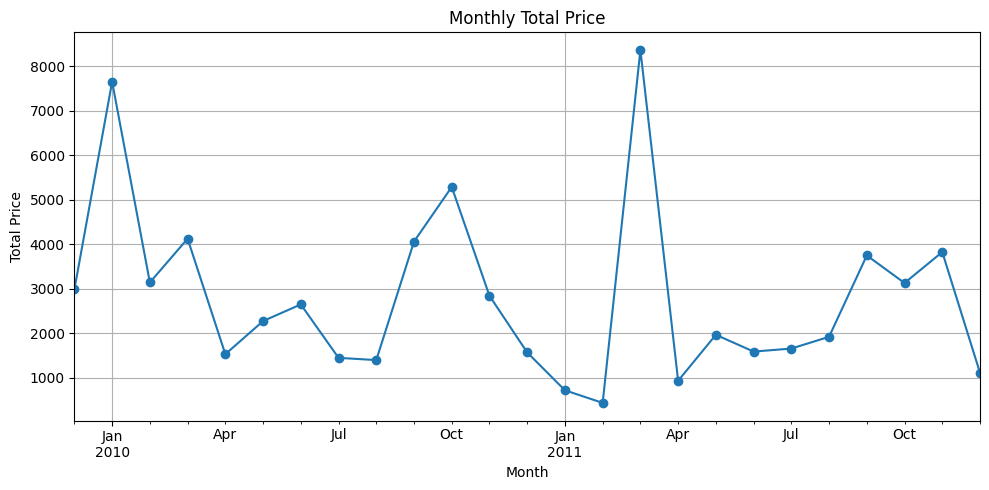

In [60]:
# Resample and sum monthly prices
monthly_price = user_y['Price'].resample('ME').sum()
monthly_price.plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Total Price')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid(True)
plt.tight_layout()
plt.show()

Upon comparing Both users we will be taking the user x for creating our model

In [73]:
user_x

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-02 15:41:00,489875,79160,HEART SHAPE WIRELESS DOORBELL,11,2.10,17841.0,United Kingdom
2009-12-02 15:41:00,489875,20620,RED SPOTTY PASSPORT COVER,1,2.10,17841.0,United Kingdom
2009-12-02 15:41:00,489875,84750B,BLACK SMALL GLASS CAKE STAND,1,1.95,17841.0,United Kingdom
2009-12-02 15:41:00,489875,21218,RED SPOTTY BISCUIT TIN,1,3.75,17841.0,United Kingdom
2009-12-02 15:41:00,489875,84765,SILVER ROCOCO CANDELABRA,3,12.75,17841.0,United Kingdom
...,...,...,...,...,...,...,...
2010-12-09 17:27:00,538163,22942,CHRISTMAS LIGHTS 10 SANTAS,1,8.50,17841.0,United Kingdom
2010-12-09 17:27:00,538163,22754,SMALL RED BABUSHKA NOTEBOOK,2,0.85,17841.0,United Kingdom
2010-12-09 17:27:00,538163,20668,DISCO BALL CHRISTMAS DECORATION,24,0.12,17841.0,United Kingdom


In [82]:
user_df = user_x.drop(['Country','Description','Invoice', 'StockCode','Customer ID'], axis=1).copy()
user_df

,Quantity,Price
InvoiceDate,,
2009-12-02 15:41:00,11,2.10
2009-12-02 15:41:00,1,2.10
2009-12-02 15:41:00,1,1.95
2009-12-02 15:41:00,1,3.75
2009-12-02 15:41:00,3,12.75
...,...,...
2010-12-09 17:27:00,1,8.50
2010-12-09 17:27:00,2,0.85
2010-12-09 17:27:00,24,0.12
